<a href="https://colab.research.google.com/github/shivani1912/MusicApp_Churn/blob/master/MusicApp_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context:**
Music Streaming Industry
Subscription based model
Seeking market share

**Business Problem:**
We’re losing customers at a
9% churn rate

**Our Objective:** Identifying at
risk customers



In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip install -q findspark
!wget -q https://downloads.apache.org/spark/spark-3.0.0-preview2/spark-3.0.0-preview2-bin-hadoop2.7.tgz
!tar xvf spark-3.0.0-preview2-bin-hadoop2.7.tgz

spark-3.0.0-preview2-bin-hadoop2.7/
spark-3.0.0-preview2-bin-hadoop2.7/data/
spark-3.0.0-preview2-bin-hadoop2.7/data/streaming/
spark-3.0.0-preview2-bin-hadoop2.7/data/streaming/AFINN-111.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_binary_classification_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_kmeans_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_multiclass_classification_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_lda_libsvm_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/iris_libsvm.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/pagerank_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/sample_linear_regression_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/pic_data.txt
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/als/
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/als/test.data
spark-3.0.0-preview2-bin-hadoop2.7/data/mllib/als/sample_movielens_rati

In [ ]:
import os
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-preview2-bin-hadoop2.7"
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!pip install findspark
!pip install pyspark

     |████████████████████████████████| 217.8MB 54kB/s 
     |████████████████████████████████| 204kB 32.5MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218257927 sha256=567b5b5cd14e3ff411e613579f09cebda86fa2e5de75ebd36562b10a381616ce
  Stored in directory: /root/.cache/pip/wheels/bf/db/04/61d66a5939364e756eb1c1be4ec5bdce6e04047fc7929a3c3c
Successfully built pyspark


In [ ]:
import findspark
findspark.init()
#from pyspark.sql import SparkSession

In [ ]:
from pyspark.sql import SparkSession
#findspark.init()
spark = SparkSession\
            .builder\
            .master('local')\
            .appName('Spotify Final version1')\
            .getOrCreate()

In [ ]:
 df = spark.read.json('mini_sparkify_event_data.json')

In [ ]:
df.printSchema()

root
 |-- artist: string (nullable = true)
 |-- auth: string (nullable = true)
 |-- firstName: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- itemInSession: long (nullable = true)
 |-- lastName: string (nullable = true)
 |-- length: double (nullable = true)
 |-- level: string (nullable = true)
 |-- location: string (nullable = true)
 |-- method: string (nullable = true)
 |-- page: string (nullable = true)
 |-- registration: long (nullable = true)
 |-- sessionId: long (nullable = true)
 |-- song: string (nullable = true)
 |-- status: long (nullable = true)
 |-- ts: long (nullable = true)
 |-- userAgent: string (nullable = true)
 |-- userId: string (nullable = true)



In [ ]:
df.head(5)

[Row(artist='Martha Tilston', auth='Logged In', firstName='Colin', gender='M', itemInSession=50, lastName='Freeman', length=277.89016, level='paid', location='Bakersfield, CA', method='PUT', page='NextSong', registration=1538173362000, sessionId=29, song='Rockpools', status=200, ts=1538352117000, userAgent='Mozilla/5.0 (Windows NT 6.1; WOW64; rv:31.0) Gecko/20100101 Firefox/31.0', userId='30'),
 Row(artist='Five Iron Frenzy', auth='Logged In', firstName='Micah', gender='M', itemInSession=79, lastName='Long', length=236.09424, level='free', location='Boston-Cambridge-Newton, MA-NH', method='PUT', page='NextSong', registration=1538331630000, sessionId=8, song='Canada', status=200, ts=1538352180000, userAgent='"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2062.103 Safari/537.36"', userId='9'),
 Row(artist='Adam Lambert', auth='Logged In', firstName='Colin', gender='M', itemInSession=51, lastName='Freeman', length=282.8273, level='paid', location='

Cleaning the dataset 
- check the shape of the dataset

In [ ]:
#number of rows
print(df.count())
#number of columns
print(len(df.columns))

286500
18


- Converting categorical columns in usable format

In [ ]:
#all categorical columns
import re
from pyspark.sql.functions import *
catg_cols = [i.name for i in df.schema.fields if "StringType" in str(i.dataType)]

#Remove special characters except ',','-' from String type columns
for field in catg_cols:
        df = df.withColumn(field, regexp_replace(field, '[^a-zA-Z0-9\,\-]', ''))

In [ ]:
df.head(5)

[Row(artist='MarthaTilston', auth='LoggedIn', firstName='Colin', gender='M', itemInSession=50, lastName='Freeman', length=277.89016, level='paid', location='Bakersfield,CA', method='PUT', page='NextSong', registration=1538173362000, sessionId=29, song='Rockpools', status=200, ts=1538352117000, userAgent='Mozilla50WindowsNT61WOW64rv310Gecko20100101Firefox310', userId='30'),
 Row(artist='FiveIronFrenzy', auth='LoggedIn', firstName='Micah', gender='M', itemInSession=79, lastName='Long', length=236.09424, level='free', location='Boston-Cambridge-Newton,MA-NH', method='PUT', page='NextSong', registration=1538331630000, sessionId=8, song='Canada', status=200, ts=1538352180000, userAgent='Mozilla50WindowsNT61WOW64AppleWebKit53736KHTML,likeGeckoChrome3702062103Safari53736', userId='9'),
 Row(artist='AdamLambert', auth='LoggedIn', firstName='Colin', gender='M', itemInSession=51, lastName='Freeman', length=282.8273, level='paid', location='Bakersfield,CA', method='PUT', page='NextSong', registra

In [ ]:
from pyspark.sql.types import *
#Treating timestamp(ts) column
df = df.withColumn('interaction_time', from_unixtime(col('ts').cast(LongType())/1000).cast(TimestampType()))
#Get month from the timestamp
df = df.withColumn('month', month(col('interaction_time')))
#store the date from timestamp in the date column
df = df.withColumn('date', from_unixtime(col('ts')/1000).cast(DateType()))

In [ ]:
#cast user Id as longtype
df = df.withColumn('userId', col('userId').cast(LongType()))
#remove user id null
df = df.filter(col('userId').isNotNull())

In [ ]:
df.groupBy('auth').count().show()

+---------+------+
|     auth| count|
+---------+------+
| LoggedIn|278102|
|Cancelled|    52|
+---------+------+



In [ ]:
#Split location and extract state from it
df = df.withColumn('location', split(col('location'),',').getItem(1))
df.select('location').show(5)

+--------+
|location|
+--------+
|      CA|
|   MA-NH|
|      CA|
|   MA-NH|
|      CA|
+--------+
only showing top 5 rows



- Number of days since they registered


In [ ]:
#for each user, find the last time record in the dataset
latest_record =  df.groupBy('userId').agg(max('ts').alias('latest_time'))

#concat the latest_time feature using join on User id with the original df
#dividing by 24*3600*1000 to get days
df = latest_record.join(df, on='userId').\
withColumn('days_registered', ((col('latest_time')-col('registration'))/86400000).cast(IntegerType()))

A customer is churned if:
- there is row where page is cancel confirmation
- Auth column's value is cancelled 
As the data includes a row for everytime a user uses the app
We check for the above cases at a user level and if their occurence is observed we consider the customer as churned


In [ ]:
#create a label for all the users who cancelled subscription i.e. churned
#aggregate and look for records where a user cancelled
churn_df = df.withColumn('label',
                             when((col('page').\
                                   isin(['Cancellation Confirmation','Cancel'])) | \
                                  (col('auth')=='Cancelled'),1 ).\
                             otherwise(0)).\
    groupby('userId').agg(sum('label').alias('label')).\
    withColumn('label', when(col('label')>=1 ,1).otherwise(0))



#join these churn_yn with the original to get an additional column named label
df = df.join(churn_df, on='userId')#cancelled_rows>=1 then Churn (1) else 0

In [ ]:
#Check distribution
df.groupBy('label').count().show()

+-----+------+
|label| count|
+-----+------+
|    0|233290|
|    1| 44864|
+-----+------+



How often does users watch sessions in a day or a month on an average?
- Monthly & daily Average number of sessions

In [ ]:
df.groupBy('sessionID').count().show(5)
#We can see from the results that session IDs are repeating across records considerably

+---------+-----+
|sessionID|count|
+---------+-----+
|        1|  680|
|      637|   55|
|     1342|   21|
|     1487|   97|
|     1560|    8|
+---------+-----+
only showing top 5 rows



In [ ]:
#Average number of sessions seen on a daily basis by a user
df.groupby('userID','date').agg(countDistinct('sessionID')).\
    groupBy('userID').avg('count(sessionID)').show(5)

+------+---------------------+
|userID|avg(count(sessionID))|
+------+---------------------+
|     2|                  1.0|
|     3|                  1.0|
|     4|   1.0769230769230769|
|     5|                  1.0|
|     6|   1.1785714285714286|
+------+---------------------+
only showing top 5 rows



In [ ]:
#Average sessions seen on a monthly basis by a user
df.groupby('userID','month').agg(countDistinct('sessionID')).\
    groupBy('userID').avg('count(sessionID)').show(5)

+------+---------------------+
|userID|avg(count(sessionID))|
+------+---------------------+
|     2|                  3.5|
|     3|                  4.0|
|     4|                 11.0|
|     5|                  3.0|
|     6|                 12.0|
+------+---------------------+
only showing top 5 rows



In [ ]:
#daily averages
user_session_df = df.groupby('userID','date').agg(countDistinct('sessionID')).\
    groupBy('userID').avg('count(sessionID)').\
    withColumnRenamed('avg(count(sessionID))', 'daily_avg')
#monthly averages  
monthly_averages = df.groupby('userID','month').agg(countDistinct('sessionID')).\
  groupBy('userID').avg('count(sessionID)').\
  withColumnRenamed('avg(count(sessionID))', 'monthly_avg')

user_session_df= user_session_df.join(monthly_averages, on='userID')
user_session_df.head(5)

[Row(userID=2, daily_avg=1.0, monthly_avg=3.5),
 Row(userID=3, daily_avg=1.0, monthly_avg=4.0),
 Row(userID=4, daily_avg=1.0769230769230769, monthly_avg=11.0),
 Row(userID=5, daily_avg=1.0, monthly_avg=3.0),
 Row(userID=6, daily_avg=1.1785714285714286, monthly_avg=12.0)]

A customer can have a paid service and change back to free if they feel like it's not worth it
Or it can be other way round that they were using free before then moved to paid service
So what is their last known status can give us a valuable info about engagement status
- Last active status known (Paid or Free)

In [ ]:
df.groupBy('level').count().show()

+-----+------+
|level| count|
+-----+------+
| paid|222433|
| free| 55721|
+-----+------+



In [ ]:
#create a dataframe with latest level for each user
last_level = df.orderBy('ts', ascending=False).groupBy('userID').agg(first('level').alias('level'))
#Converting Gender to a numeric column (Male-1, Female-0)
from pyspark.sql import functions as F
last_level = last_level.withColumn("level", F.when(last_level.level == "paid",1).otherwise(0))

#Drop exisitng label column
df = df.drop('level')

#join to get the existing label
df = df.join(last_level, on='userID')

In [ ]:
df.groupBy('level').count().show()

+-----+------+
|level| count|
+-----+------+
|    1|236188|
|    0| 41966|
+-----+------+



In [ ]:
#QC number of users in our session df for each user
user_session_df.count()

225

In [ ]:
#distinct count of users in our original frame
df.agg(countDistinct('userID')).show()

#As numbers are equal we are good

+-------------+
|count(userID)|
+-------------+
|          225|
+-------------+



Average length of a session : How much time a user spent in a session on an average

In [ ]:
session_length = df.groupBy('userID').avg('length').\
withColumnRenamed('avg(length)', 'length')

#Drop actual length column , replace it with avg of length 
df = df.drop('length')
df = df.join(session_length, on='userId')

Same as averages for sessions , we can consider the same for items accessed by the user everytime they visit the app at a daily and monthly level 
- Average items at a daily and monthly level

In [ ]:
#distinct count of items seen in an session
df.agg(countDistinct('itemInSession')).show()

+--------------------+
|count(itemInSession)|
+--------------------+
|                1311|
+--------------------+



In [ ]:
#Daily Average
user_item_df = df.groupby('userID','date').agg(max('itemInSession')).\
groupBy('userID').avg('max(itemInSession)').\
withColumnRenamed('avg(max(itemInSession))', 'avg_daily_items')

monthly_avg = df.groupby('userID','month').agg(max('itemInSession')).\
groupBy('userID').avg('max(itemInSession)').\
withColumnRenamed('avg(max(itemInSession))', 'avg_monthly_items')

user_item_df=user_item_df.join(monthly_avg, on='userID')
user_item_df.head(5)

[Row(userID=2, avg_daily_items=141.11111111111111, avg_monthly_items=317.5),
 Row(userID=3, avg_daily_items=72.4, avg_monthly_items=138.0),
 Row(userID=4, avg_daily_items=138.30769230769232, avg_monthly_items=487.5),
 Row(userID=5, avg_daily_items=40.285714285714285, avg_monthly_items=73.0),
 Row(userID=6, avg_daily_items=217.89285714285714, avg_monthly_items=556.0)]

In [ ]:
df.agg(countDistinct('artist')).show()

+-------------+
|count(artist)|
+-------------+
|        17537|
+-------------+



- Duration of each session :<br>
Under same session id -> max(time stamp) - min(time stamp)
How long does user uses the App? can also tell us a lot about their engagement behavior

In [ ]:
session_duration_df = df.groupby('userID','date','sessionId').\
    agg(max('ts').alias('end'), min('ts').alias('start')).\
    withColumn('duration_s', (col('end')-col('start'))*0.001).\
    groupby('userID','date').\
    avg('duration_s').\
    groupby('userID').\
    agg(mean('avg(duration_s)').alias('avg_daily_duration')).\
    orderBy('userID', ascending=False)
    

In [ ]:
#Join with user session dataframe
#Append avg session duration in seconds (*0.001 to millisecs) 
user_session_df= user_session_df.join(session_duration_df, on='userID')
user_session_df.head(5)

[Row(userID=2, daily_avg=1.0, monthly_avg=3.5, avg_daily_duration=20721.555555555555),
 Row(userID=3, daily_avg=1.0, monthly_avg=4.0, avg_daily_duration=11766.8),
 Row(userID=4, daily_avg=1.0769230769230769, monthly_avg=11.0, avg_daily_duration=18382.28846153846),
 Row(userID=5, daily_avg=1.0, monthly_avg=3.0, avg_daily_duration=5438.857142857143),
 Row(userID=6, daily_avg=1.1785714285714286, monthly_avg=12.0, avg_daily_duration=25713.011904761905)]

How many songs does the user listen to in a session?

In [ ]:
df.select('song').show(5)

+----------------+
|            song|
+----------------+
|   RollerJubilee|
|  ElBaileOficial|
|           UseMe|
|BlameItOnTheRain|
|           Human|
+----------------+
only showing top 5 rows



In [ ]:
df.groupby('userID','date','sessionID').\
    agg(count('song').alias('num_songs'),).\
    groupby('userID','date').\
    agg(mean('num_songs')).\
    groupby('userID').\
    agg(mean('avg(num_songs)').alias('avg_num_songs')).\
    orderBy('userID', ascending=False).agg(min('avg_num_songs')).show()

+------------------+
|min(avg_num_songs)|
+------------------+
|               3.0|
+------------------+



In [ ]:
#create a dataframe at a user level capturing number of songs heard on an avg in  a session
songs_avg= df.groupby('userID','date','sessionID').\
    agg(countDistinct('song').alias('num_songs'),).\
    groupby('userID','date').\
    avg('num_songs').\
    groupby('userID').\
    agg(mean('avg(num_songs)').alias('avg_num_songs')).\
    orderBy('userID', ascending=False)

songs_avg.head(10)

[Row(userID=300025, avg_num_songs=61.71052631578947),
 Row(userID=300024, avg_num_songs=87.0),
 Row(userID=300023, avg_num_songs=67.45138888888889),
 Row(userID=300022, avg_num_songs=38.7037037037037),
 Row(userID=300021, avg_num_songs=60.577777777777776),
 Row(userID=300020, avg_num_songs=79.33333333333333),
 Row(userID=300019, avg_num_songs=77.85),
 Row(userID=300018, avg_num_songs=51.129629629629626),
 Row(userID=300017, avg_num_songs=52.24),
 Row(userID=300016, avg_num_songs=39.65384615384615)]

In [ ]:
#Join with user session dataframe
#Append avg number of songs
user_session_df= user_session_df.join(songs_avg, on='userID')
user_session_df.head(5)

[Row(userID=2, daily_avg=1.0, monthly_avg=3.5, avg_daily_duration=20721.555555555555, avg_num_songs=82.33333333333333),
 Row(userID=3, daily_avg=1.0, monthly_avg=4.0, avg_daily_duration=11766.8, avg_num_songs=42.4),
 Row(userID=4, daily_avg=1.0769230769230769, monthly_avg=11.0, avg_daily_duration=18382.28846153846, avg_num_songs=74.0576923076923),
 Row(userID=5, daily_avg=1.0, monthly_avg=3.0, avg_daily_duration=5438.857142857143, avg_num_songs=22.857142857142858),
 Row(userID=6, daily_avg=1.1785714285714286, monthly_avg=12.0, avg_daily_duration=25713.011904761905, avg_num_songs=101.51785714285714)]

Gender Column

In [ ]:
#Converting Gender to a numeric column (Male-1, Female-0)
from pyspark.sql import functions as F
df = df.withColumn("gender", F.when(df.gender == "M",1).otherwise(0))

In [ ]:
df.groupBy('method').count().show()
#Not relevant to our problem statement

+------+------+
|method| count|
+------+------+
|   PUT|257818|
|   GET| 20336|
+------+------+



### Feature Set

In [ ]:
#Drop all the columns not needed
#We created derived features from the dropped columns at a user level
df = df.drop('auth','userAgent','month','date','interaction_time','registration', 'ts','song','page','itemInSession','sessionID',\
             'artist','firstName','lastName','method','status')
 
#joining user session df with original df to retain imp columns
cleaned_df = user_session_df.join(df, on='userID')
#drop duplicate rows
cleaned_df = cleaned_df.drop_duplicates(['userID'])

#Drop userID as they are irrelevant in modeling steps
feature_set = cleaned_df.drop('userID').fillna(0)

In [ ]:
cleaned_df.count() #should be 225 as there are 225 customers

225

In [ ]:
df.printSchema()

root
 |-- userId: long (nullable = true)
 |-- latest_time: long (nullable = true)
 |-- gender: integer (nullable = false)
 |-- location: string (nullable = true)
 |-- days_registered: integer (nullable = true)
 |-- label: integer (nullable = false)
 |-- level: integer (nullable = false)
 |-- length: double (nullable = true)



In [ ]:
feature_set = cleaned_df.drop('userID')

In [ ]:
#categorical columns
cat_cols = [i.name for i in feature_set.schema.fields if "StringType" in str(i.dataType)]
#numerical columns
num_cols = [i.name for i in feature_set.schema.fields if "IntegerType" in str(i.dataType)]
num_cols.remove('label')

In [ ]:
feature_set.printSchema()

root
 |-- daily_avg: double (nullable = true)
 |-- monthly_avg: double (nullable = true)
 |-- avg_daily_duration: double (nullable = true)
 |-- avg_num_songs: double (nullable = true)
 |-- latest_time: long (nullable = true)
 |-- gender: integer (nullable = false)
 |-- location: string (nullable = true)
 |-- days_registered: integer (nullable = true)
 |-- label: integer (nullable = false)
 |-- level: integer (nullable = false)
 |-- length: double (nullable = true)



### Model Pipeline

**Observation dataset:**
a)Events’ log data

**Target/Explanatory Variable:**
a)When the event page value is ‘Cancelled
b)When the event has ‘Auth’ Colum value as “Cancelled”

**Derived features to build the pipeline:**
Features we have derived from the events log

* Avg. number of sessions logged daily
* Avg. number of sessions logged monthly
* Avg. time spent per session in seconds
* Avg. no. of songs heard daily
* Days since registration
* Latest Auth status
* Paid or FreeList item







In [ ]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
#Assign indices to each category under categorical columns
stages = []

#for each categorical variable
for categoricalCol in cat_cols:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    #converting categorical columns to onehot encoded vectors
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]

#create the feature vector containing all features
#num_cols-all the variable column names which are numeric

assemblerInputs = [c + "classVec" for c in cat_cols] + num_cols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]


In [ ]:
assembler

VectorAssembler_b470cfcfbad1

In [ ]:
user_session_df.printSchema()

root
 |-- userID: long (nullable = true)
 |-- daily_avg: double (nullable = true)
 |-- monthly_avg: double (nullable = true)
 |-- avg_daily_duration: double (nullable = true)
 |-- avg_num_songs: double (nullable = true)



In [ ]:
from pyspark.ml import Pipeline
import pandas as pd

#Using pipeline to apply all transformations
#create a list of all column names
all_cols=[]
all_cols = feature_set.columns
pipeline = Pipeline(stages = stages)
#create model object
pipelineModel = pipeline.fit(feature_set)
#tranform the model dataset
model_data = pipelineModel.transform(feature_set)
selectedCols = ['features']+all_cols
#restore all the transformed columns in the model dataset
model_data = model_data.select(selectedCols)

#Display in pandas dataframe format
pd.DataFrame(model_data.take(5), columns=model_data.columns)

,features,daily_avg,monthly_avg,avg_daily_duration,avg_num_songs,latest_time,gender,location,days_registered,label,level,length
0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",1.000000,3.5,20721.555556,82.333333,1542839404000,0,NC,69,0,1,249.917064
1,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.000000,4.0,11766.800000,42.400000,1540875543000,1,MT,80,1,1,254.321240
2,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.076923,11.0,18382.288462,74.057692,1543595548000,1,MD,62,0,1,247.138692
3,"(0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",1.000000,3.0,5438.857143,22.857143,1541637201000,1,AZ,48,0,0,245.497186
4,"(0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.178571,12.0,25713.011905,101.517857,1543531706000,1,TX,256,0,1,249.204344


In [ ]:
selectedCols

['features',
 'daily_avg',
 'monthly_avg',
 'avg_daily_duration',
 'avg_num_songs',
 'latest_time',
 'gender',
 'location',
 'days_registered',
 'level',
 'length']

### Test and Training set

In [ ]:
train_data, test_data = model_data.randomSplit([0.75, 0.25], seed = 31)

#QC
print(train_data.count())
print(test_data.count())

153
72


#### Model Evaluation Standard

In [ ]:
def model_eval(results):

    from pyspark.ml.evaluation import BinaryClassificationEvaluator
    from pyspark.ml.evaluation import  MulticlassClassificationEvaluator

    evaluator = BinaryClassificationEvaluator()
    print("Test_SET (Area Under ROC): " + str(evaluator.evaluate(results, {evaluator.metricName: "areaUnderROC"})))

    f1_score_evaluator = MulticlassClassificationEvaluator(metricName='f1')
    f1_score = f1_score_evaluator.evaluate(results.select(col('label'), col('prediction')))
    print('The F1 score on the test set is {:.2%}'.format(f1_score)) 

#### Logistic Regression

In [ ]:
from pyspark.ml.classification import LogisticRegression
Logreg = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=15)
Log_model = Logreg.fit(train_data)
predictions = Log_model.transform(test_data)

model_eval(predictions)

Test_SET (Area Under ROC): 0.6501116071428569
The F1 score on the test set is 68.52%


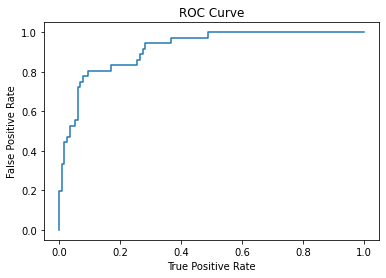

Training set ROC: 0.9178537511870843


In [ ]:
#plotting the ROC Curve
import matplotlib.pyplot as plt
trainingSummary = Log_model.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set ROC: ' + str(trainingSummary.areaUnderROC))

#### Gradient Boosting

In [ ]:
from pyspark.ml.classification import GBTClassifier
gradbt = GBTClassifier(maxIter=15)
GBT_Model = gradbt.fit(train_data)
gbt_predictions = GBT_Model.transform(test_data)

In [ ]:
#Evaluation
model_eval(gbt_predictions)

Test_SET (Area Under ROC): 0.6160714285714286
The F1 score on the test set is 72.79%


#### RandomForest Classifier

In [ ]:
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, GBTClassifier
rf = RandomForestClassifier()
rf_Model = rf.fit(train_data)
rf_predictions = rf_Model.transform(test_data)

In [ ]:
#Evaluation
model_eval(rf_predictions)

Test_SET (Area Under ROC): 0.6707589285714287
The F1 score on the test set is 68.71%


**Conclusion:**
Business context indicates that there is a significant business cost attached to retaining at risk customers, i.e., there is significant cost attached to Type I & Type II error. Therefore, we consider F1 score & ROC instead of Precision & Recall.

Based on that criteria we select Random Forest model to identify churn risk.


**Next Steps:**
1. Model Identifies At Risk customers:
2. Customer Segment: We then segment the customers based on the risk
    * High Risk --‘lost’ cases
    * Low Risk not enough incentivization
    * Medium Risk ------> Target
3. A/B Test the retention incentives : Roll out customized emails, app notifications to generate insights for the target segment 
